<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Introduction to data visualisation



In this exercise, we will reinforce our knowledge of the fundamental concepts of data visualisation by applying Matplotlib, and data preparation and analysis techniques, to a real-world scenario.

## Learning objectives
By the end of this exercise, you should be able to:

* Group, sort, and sum data to plot an insightful visual.

### Import packages and data

In [4]:
# Import libraries 
import matplotlib.pyplot as plt #used for plotting data 
import numpy as np #used for mathematical operations
import pandas as pd #used to load CSV data

For this exercise, we will be using [the tips](https://www.kaggle.com/jsphyg/tipping) dataset, which consists of customer tip data collected over a period of two and half months in early 1990 from one restaurant by a food server.

Let's go ahead and import our data.

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Exercise 

The restaurant would like to add an expansion to accommodate the growing number of customers they anticipate will visit the restaurant during the festive season. In the expansion, they have decided to increase the seating area for non-smoking customers but are uncertain if they should increase the area of the restaurant that is designated for smoking customers too. They have decided to use the data captured by the server to assist them in making this decision. 

Let's see if we can help them to make a decision based on the "Total bill"  racked up by the smoking and non-smoking customers to see if an expansion to the smoking area of the restaurant is worth their while. 

### Exercise 1

Group and sum the data by the number of values for each `smoker` category.

In [7]:
# Your solution here...
smoker_category = df.groupby('smoker')['total_bill'].agg(['sum', 'count']).reset_index()
smoker_category.columns= ['smoker_category', 'sum_total_bill', 'count_people']
smoker_category['sum_total_bill'] = smoker_category['sum_total_bill'].apply(lambda x: f"${x:,.2f}")
grouped= smoker_category.sort_values(by= 'sum_total_bill' , ascending=True)
grouped= smoker_category.sort_values(by= 'count_people', ascending=True)
print(grouped)

  smoker_category sum_total_bill  count_people
1             Yes      $1,930.34            93
0              No      $2,897.43           151


### Exercise 2

Sort the indices and values that we will use as our `y-axis` and `x-axis`.

In [8]:
# Your solution here...
# Group and sum data as before
grouped = df.groupby('smoker')['total_bill'].sum()

# Sort the index (smoker categories)
grouped = grouped.sort_index()

# Extract x and y values for plotting
x = grouped.index     # This will be your x-axis (e.g. 'Yes', 'No')
y = grouped.values    # This will be your y-axis (total bill amounts)

print("x-axis (smoker_category):", x)
print("y-axis (sum_total_bill):", y)


x-axis (smoker_category): Index(['No', 'Yes'], dtype='object', name='smoker')
y-axis (sum_total_bill): [2897.43 1930.34]


### Exercise 3

Plot a bar graph of the total bill (y-axis) for smoking vs non-smoking customers (x-axis).  

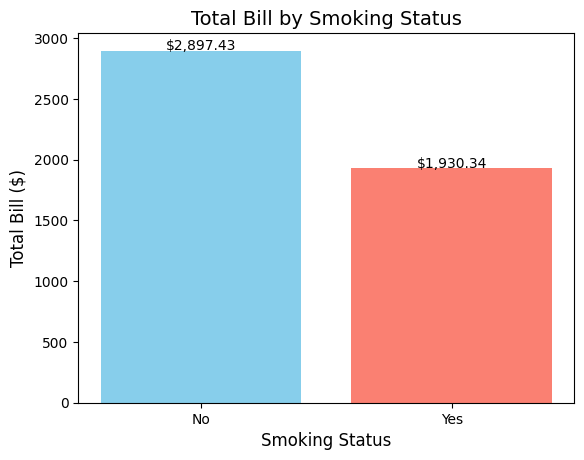

In [9]:
# Your solution here...#
import matplotlib.pyplot as plt
import pandas as pd

# Group and sum the total bill by smoker category
grouped = df.groupby('smoker')['total_bill'].sum().sort_index()

# Create the bar plot
plt.bar(grouped.index, grouped.values, color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Total Bill by Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)

# Add the actual values above each bar
for i, value in enumerate(grouped.values):
    plt.text(i, value + 5, f'${value:,.2f}', ha='center', fontsize=10)

# Display the graph
plt.show()


In [14]:
# Count number of people per smoker group
counted = df['smoker'].value_counts().sort_index()

x = counted.index
y = counted.values

print("x-axis (Smoker categories):", x.tolist())
print("y-axis (Number of people):", y.tolist())


x-axis (Smoker categories): ['No', 'Yes']
y-axis (Number of people): [151, 93]


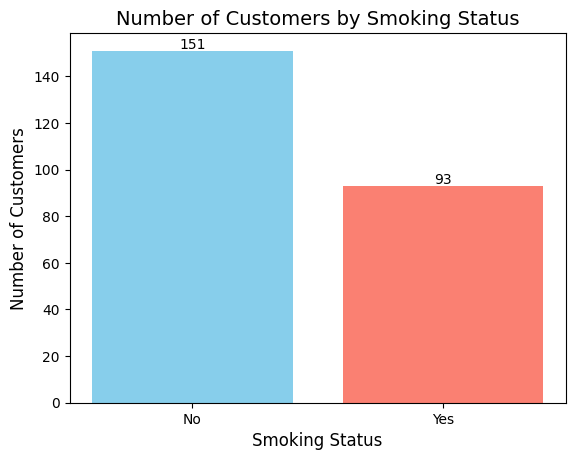

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of people (rows) per smoker category
counted = df['smoker'].value_counts().sort_index()

# Create the bar plot
plt.bar(counted.index, counted.values, color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Number of Customers by Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add the count labels on top of each bar
for i, value in enumerate(counted.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10)

# Display the plot
plt.show()


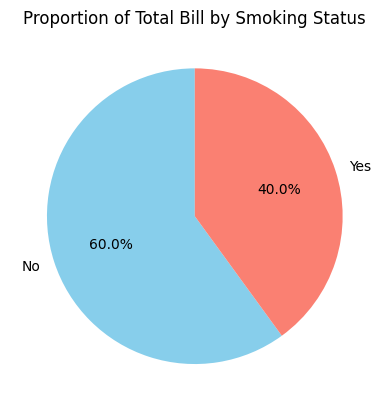

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Group and sum the total bill by smoker
bill_group = df.groupby('smoker')['total_bill'].sum().sort_index()

# Create the pie chart
plt.pie(
    bill_group.values,
    labels=bill_group.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)

plt.title('Proportion of Total Bill by Smoking Status')
plt.show()


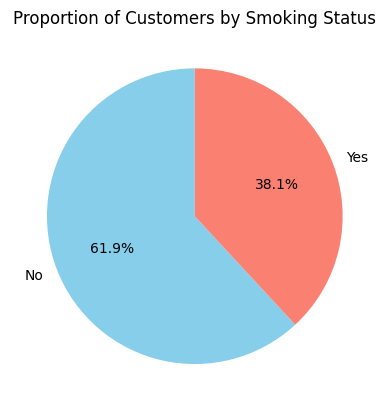

In [17]:
# Count number of people per smoker category
count_group = df['smoker'].value_counts().sort_index()

# Create the pie chart
plt.pie(
    count_group.values,
    labels=count_group.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)

plt.title('Proportion of Customers by Smoking Status')
plt.show()


Interpret the results of the plot.

## Solutions

### Exercise 1

In [11]:
# Grouping and summing by the 'smoker' category
title_smoker = df.groupby('smoker')[['total_bill','tip','size']].sum()

# Displaying the result
print(title_smoker)

        total_bill     tip  size
smoker                          
No         2897.43  451.77   403
Yes        1930.34  279.81   224


### Exercise 2

In [12]:
smoker_status = title_smoker.total_bill.sort_values().index # sort the indices and store them under the variable smoker_status
bill = title_smoker.total_bill.sort_values() # sort the rest of the data and store it under the variable bill
print(bill)

smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64


### Exercise 3

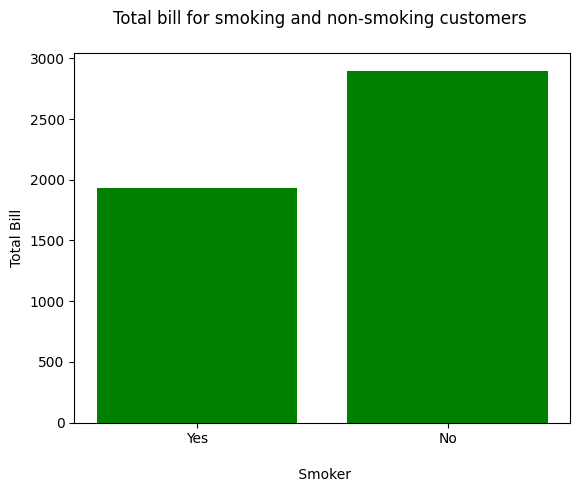

In [13]:
# Plot total bill (y-axis) per smoker status (x-axis) 
# We set the x-axis, y-axis, and the colour of the bars
plt.bar(smoker_status, bill, color= 'green')

# Set x and y axis titles
plt.ylabel('Total Bill')
plt.xlabel('\n Smoker') 
# Set graph title
plt.title('Total bill for smoking and non-smoking customers \n')

# Show graph
plt.show()

As we can see, non-smokers have a larger total bill than smokers. This shows that investing in more seating for non-smoking consumers is a wise idea. The overall bill incurred by smoking customers is also significant (though lower than the non-smoking customers), so investing in expanding the section of the restaurant allocated for smoking customers may also be advantageous.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/refs/heads/master/ALX_banners/ALX_Navy.png"  style="width:140px";/>
</div>